# Par 1: Data Wrangling - Cars Pricing Dataset

#### Objectives:
1. Handling missing values
2. Correct data formatting
3. Normalize data

#### Table of Contents
1. Identify missing values
    - Identify missing values
    - Deal with missing values
    - Correct data format
2. Data Normalization (centering/scaling)
3. Binning
4. Indicator Variable


#### What is the purpose of data wrangling?
We use data wrangling to convert data from an initial format to a format that may be better for analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 11 Car Pricing Analysis Python\Dataset_Raw.csv")

df.head(8)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


In [4]:
#Create a python list headers containing name of headers.
columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
# Use the Pandas method read_csv() to load the data. Set the parameters "names"
# equal to the Python list "headers"

df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 11 Car Pricing Analysis Python\Dataset_Raw.csv", names = columns)

df.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


In [10]:
df.shape

(205, 26)

We can see several question marks appeared in the data frame; those missing values may hinder futher anlaysis.

So, how do we identify all those missing values and deal with them?

##### How to work with missing data?
Steps for working with missing data:

1. Identify missing data
2. Deal with missing data
3. Correct data format


### Identifying and handling missing values

<b> Convert "?" to NaN </b>

In the dataset, missing data comes witht the question mark "?". We replace "?" with NaN(Not a Number), Python's default missing value marker for reasons of computational speed and convenience. We use this function:

            .replace(A,B, inplace = True)
   to replace A by B.


In [9]:
df.replace("?",np.NaN,inplace = True)
df.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


##### Evaluating for missing Data
The missing values are converted by default. We use the following functions to identify these missing values. We can use two methods to detect missing data.
1. isnull()
2. notnull()

The output is a boolean value indicating whether the value that is passed into the arguement is in fact missing data.

In [11]:
missing_data  = df.isnull()
missing_data.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Based on the summary above, each column has 205 rows of data and seven columns contain missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke":4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data


#### How to deal with missing data

1. Drop the missing values
    a. Drop the whole row
    b. Drop the whole column
2. Replace thw missing data
    a. Replace it with average
    b. Replace it with frequency
    c. Replace it based on other functions
    
 We should only drop whole columns if most of the entites are empty. In the dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data. However, some methods may seem more reasonable than others.
 
<b> Replace by mean</b>
    - "normalize-loss", 41 missing data, replace it with mean
    - "stroke", 4 missing data, replace it with mean and so on.
 
<b>Replace by frequency</b>
    - "num-of-doors", 2 missing data, replace them with frequency
    Reason: We want to predict price. We cannot use any data entry without price data for predction; therefore any row without price data is not useful to us.
    
    
### Calculate the mean value for the "normalize-losses" and replace NaN with mean value

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [18]:
avg_norm_loss = df['normalized-losses'].astype('float').mean()
avg_norm_loss

122.0

In [19]:
df['normalized-losses'].replace(np.NaN, avg_norm_loss, inplace = True)
df['normalized-losses'].isnull().sum()

0

In [20]:
# Calculate mean value for "bore" column and replace NaN with mean.

bore_mean = df['bore'].astype('float').mean()
bore_mean

3.3297512437810943

In [21]:
df['bore'].replace(np.NaN, bore_mean, inplace = True)
df['bore'].isnull().sum()

0

In [22]:
# For stroke, horsepower, peak-rpm column, calculate theri respective mean and replace it with NaN

# For horsepower
avg_hp = df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.NaN, avg_hp, inplace = True)

# For stroke
avg_stroke = df['stroke'].astype('float').mean(axis = 0)
df['stroke'].replace(np.NaN, avg_stroke, inplace = True)

# For peak-rpm
average_rpm = df['peak-rpm'].astype('float').mean(axis = 0)

df['peak-rpm'].replace(np.nan,average_rpm,inplace=True)

df[['horsepower','stroke','peak-rpm']].isnull().sum()

horsepower    0
stroke        0
peak-rpm      0
dtype: int64

In [27]:
 df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [28]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [30]:
df['num-of-doors'].replace(np.NaN,"four",inplace = True)

df['num-of-doors'].value_counts()

num-of-doors
four    116
two      89
Name: count, dtype: int64

In [31]:
# Drop the whole row with NaN in 'price' column

df['price'].isnull().sum()

4

In [32]:
df.dropna(subset=['price'],inplace = True, axis = 0)

# reset index, because we dropped two rows
df.reset_index(drop = True, inplace = True)

df.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


In [33]:
df.shape

(201, 26)

In [34]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now we have dataset with no missing values.


## Correcting data format
The last step in data cleaning is checking and making sure that all data is in correct format (int, float, object)

In pandas, we use
   - .dtypes() to check the datatype
   - .astype() to change the datatype

In [38]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [37]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [39]:
df[['bore','stroke','price','peak-rpm']] = df[['bore','stroke','price','peak-rpm']].astype('float')

0      122
1      122
2      122
3      164
4      164
      ... 
196     95
197     95
198     95
199     95
200     95
Name: normalized-losses, Length: 201, dtype: int32

In [40]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

We obtained the cleaned dataset with no missing values and with all correct data format.

## Data Normalization

<b>Why normalization?</b>
Normalization is the porcess of transformming values of several variables intot a similar range. Typical normalizations include
1. scaling the variable so the variable average is 0.
2. scaling the variable so the variance is 1.
3. scaling the variable so the variable values ranges from 0 to 1.

<b>Example</b>
To demonstrate normalization, say we want to scale the columns "length", "width", and "height".

Target: normalize those variables so their value range from 0 to 1.  

Approach: replace the original value by (original values)/(max value)

In [42]:
df[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [46]:
# Replace the original value by (original values)/(max value)

df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()


df[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## Binning

##### Why binning?
Binning is the process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

##### Example:
  In this dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.

We use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.


In [47]:
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: object

In [48]:
# convert data to correct format
df['horsepower'] = df['horsepower'].astype('int', copy = True)

Text(0.5, 1.0, 'horsepower bins')

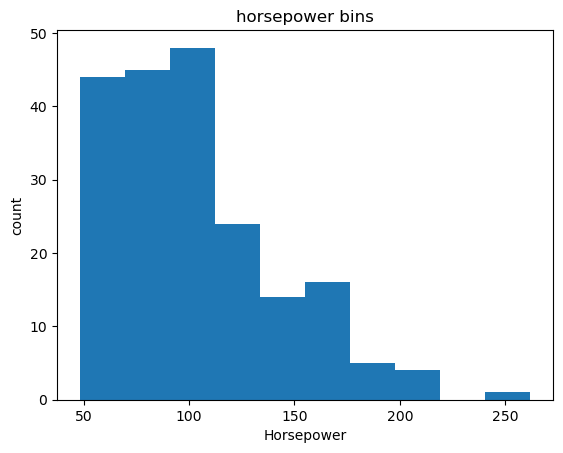

In [50]:
# Plot the histogram of horsepower to see the distribution of horsepower

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['horsepower'])
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

In [51]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']),4)
group_names = ['Low','Medium','High']

df['horsepower-binned'] = pd.cut(df['horsepower'],bins, labels = group_names, include_lowest = True)

df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [52]:
df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

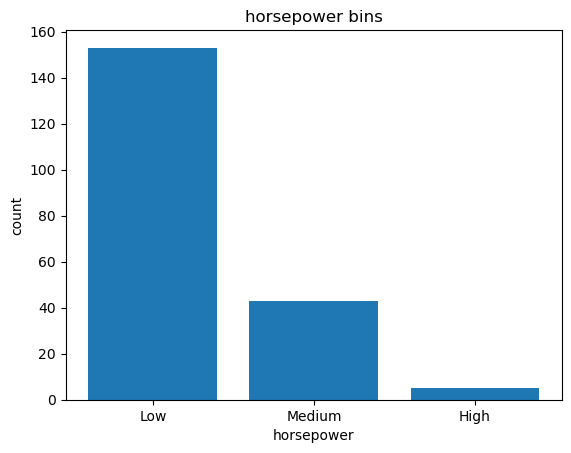

In [55]:
# plot the distribution for each bin

pyplot.bar(group_names, df['horsepower-binned'].value_counts())

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

We successfully narrowed down the intervals from 59 to 3.


## Indicator Variable

#### What is an indicator variable?
An indicator variable(or dummy variable) is a numberical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

We use indicator variable so we can use categorical variables for regression analysis in the later modules.

##### Example
The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.

Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type.

In [56]:
df['fuel-type'].value_counts()

fuel-type
gas       181
diesel     20
Name: count, dtype: int64

In [57]:
dummy_var1 = pd.get_dummies(df['fuel-type'])
dummy_var1.head(8)

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
5,False,True
6,False,True
7,False,True


In [59]:
dummy_var1.rename(columns = {'gas':'fuel-gas-type','diesel':'fuel-diesel-type'},inplace = True)
dummy_var1.head()

,fuel-diesel-type,fuel-gas-type
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [62]:
# merge dataframe df and dummy_var1

df = pd.concat([df,dummy_var1], axis = 1)

df.drop('fuel-type',inplace = True, axis = 1)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-diesel-type,fuel-gas-type,fuel-diesel-type,fuel-gas-type
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,Low,False,True,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,Low,False,True,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,Medium,False,True,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,Low,False,True,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,Low,False,True,False,True


In [63]:
df['aspiration'].value_counts()

aspiration
std      165
turbo     36
Name: count, dtype: int64

In [64]:
dummy_var2 = pd.get_dummies(df['aspiration'])

dummy_var2.head()

,std,turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [65]:
dummy_var2.rename(columns = {'std':'aspiration-std','turbo':'aspiration-turbo'},inplace = True)

df = pd.concat([df,dummy_var2],axis = 1)

df.drop('aspiration',axis = 1, inplace = True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,horsepower-binned,fuel-diesel-type,fuel-gas-type,fuel-diesel-type,fuel-gas-type,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,Low,False,True,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,Low,False,True,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,Medium,False,True,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,Low,False,True,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,Low,False,True,False,True,True,False


In [66]:
df.shape

(201, 31)

In [67]:
# Save the new cleaned CSV dataset

df.to_csv('updated_dataset.csv')

# Par 2: Model Development


#### Objectives:
   - Develop prediction models
    
In this task, I'll develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.


##### Some questions I answered in this module
   - Do I know if the dealer if offering fair value for my trade-in?
   - Do I know if I put a fair value on my car?
    
In data analytics, we often use <b>Model Developement</b> to help us predict future observation from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 11 Car Pricing Analysis Python\updated_dataset.csv")
df.head(8)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450,Low,0,1,1,0
5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,110,5500.0,19,25,15250,Low,0,1,1,0
6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,110,5500.0,19,25,17710,Low,0,1,1,0
7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,110,5500.0,19,25,18920,Low,0,1,1,0


In [5]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
horsepower-binned    0
diesel               0
gas                  0
std                  0
turbo                0
dtype: int64

# 1. Linear Regression and Multiple Linear Regression

#### Linear Regression

##### Simple Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variable:
   - The Predictor/independent variable(X)
   - The response/dependent variable (that we want to predict)(Y)
   
The result of Linear Regression is that predicts the response(dependent) variable as a function of the predictor (independent) variable.

$$
    Y: Response \ Variable \\\\
    X: Predictor \ Variables
$$


##### Linear Function
$$
Y = a+bX
$$
   - a refers to the <b>intercept</b> of the regression line: the value of Y when X is 0
   - b refers to the <b>slope</b> of the regression line: the value with which Y changes when X increases by 1 unit
    

In [3]:
# Let's load the modules for the linear regression

from sklearn.linear_model import LinearRegression

In [4]:
# Create a linear regression object

lm = LinearRegression()
lm

LinearRegression()

#### Predict car price using 'highway-mpg'

In [30]:
# How could 'highway-mpg' help us predict car price?
X = df[['highway-mpg']]
Y = df['price']

# fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

In [9]:
# We can output a prediction

Yhat = lm.predict(X)

#print whole output
Yhat[0:5] #print first five output

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [12]:
# What is the value of intercept(a) and slope(b)

print(lm.intercept_)


#slope
print(lm.coef_)

38423.305858157386
[-821.73337832]


As we say, we should get a final linear model with the structure:
$$
Yhat = a +bX  \\\\
Price = 38425.31 - 821.73 * highway-mpg
$$

#### Create a linear regression and train the model using 'engine-size' to predict price of cars

In [14]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [16]:
P = df[['engine-size']]
Q = df['price']

lm1.fit(P,Q)

Yhat1 = lm1.predict(P)


Yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [17]:
#intercept
print(lm1.intercept_)

#slope
print(lm1.coef_)

-7963.338906281042
[166.86001569]


Equation of the predicted line:

$$
Yhat = a +bX  \\\\
Yhat = -7963.34 + 166.86 * P  \\\\
Price = -7963.34 + 166.86*engine-size
$$

# Multiple Linear Regression

What if we want to predict car price using more than one variable?

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$

The equation is given by

$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


From the previous section we know that other good predictors of price could be:
   - Horsepower
   - Curb-weight
   - Engine-size
   - Highway-mpg
 
Let's develop model using these variables as the predictor variables.

In [4]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450,Low,0,1,1,0


In [19]:
A = df[['horsepower','curb-weight','engine-size','highway-mpg']]
B = df['price']

lm.fit(A,B)

LinearRegression()

In [9]:
#intercept
print('The intercept is ',lm.intercept_)

#slope
print('The slope is ',lm.coef_)

The intercept is  -15811.86376772925
The slope is  [53.53022809  4.70805253 81.51280006 36.1593925 ]


So, now we get linear function as:
$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


Price = -15806.62 + 53.4957 * <b>horsepower</b> + 4.7077 * <b>curb-weight</b> + 81.53 * <b>engine-size</b> + 36.0575 * <b>highway-mpg</b>

##### Create and train a Multiple Linear Regression model 'lm2' where the response variable is 'price' and the predictor variable is 'normalized-losses' and 'highway-mpg'

In [10]:
P = df[['normalized-losses','highway-mpg']]
Q = df['price']

lm2 = LinearRegression()
lm2.fit(P,Q)

#intercept
print("The intercept is ",lm2.intercept_)

#coefficient
print('The coefficient is ',lm2.coef_)


Yhat2 = lm2.predict(P)
Yhat2[0:5]

The intercept is  38201.31327245727
The coefficient is  [   1.49789586 -820.45434016]


array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

So, now we get linear function as:
$$
Y = a + b_1 X_1 + b_2 X_2


Price = 38201.3133 + 1.497896 * <b>normalized-losses</b> - 820.4543 * <b>highway-mpg</b>

# Model Evaluation using Visualization


#### Regression Plot
When it comes to simple linear regression, an excellent way to visualize the fit of our model is using regression plots.

This plot will show a combination of scattered data points (a <b>scatterplot</b>), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strenght of the correlation, as well as the direction (positive or negative correlation).

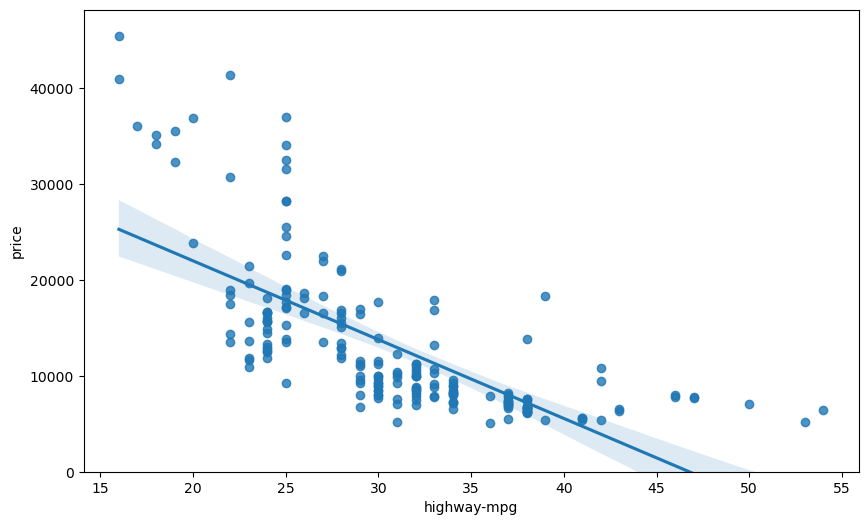

In [14]:
plt.figure(figsize = (10,6))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)
plt.savefig('Images/highway-price regression.jpg')

We can see from this plot that price is negatively correlated to highway-mpg since the regression plot is negative.

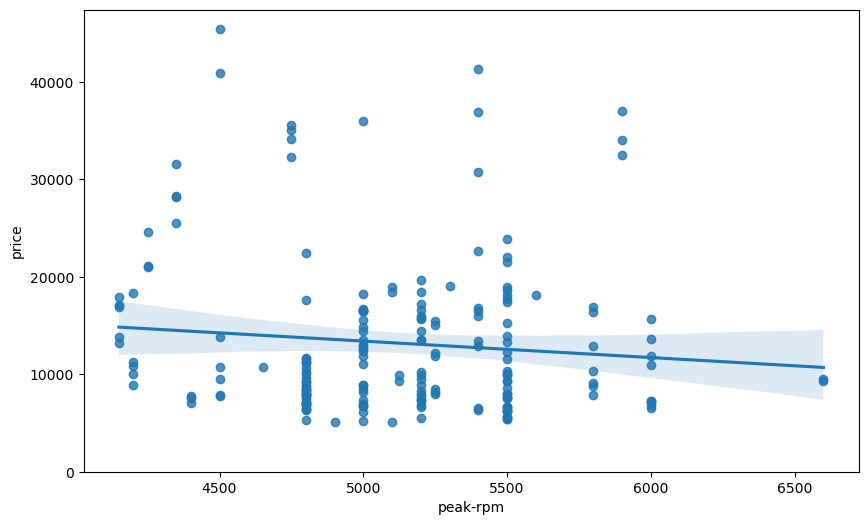

In [18]:
# Let's compare this plot to the regression plot of 'peak_rpm'

plt.figure(figsize=(10,6))
sns.regplot(x = 'peak-rpm', y ='price', data = df)
plt.ylim(0,)
plt.savefig('Images/peak_rpmVspriceRegression.jpg')

Comparing the regression plot of 'peak-rpm' and 'highway-mpg', we see that the points for 'highway-mpg' are much closer to the generated line and on average, decrease. The points for 'peak-rpm' have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the 'peak-rpm' increases.

In [19]:
# Correlation to verify which factor, peak-rpm or highway-mpg is strongly correlated with price

df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692 compared to "peak-rpm" which is approximate -0.101616.

## Residual Plot

When we loot at a regression plot, the residual is the different from the data point to the fitted regression line. The difference between observed value(y) and the predicted value(Yhat) is called the residual.
A residual plot is a graph that shows the residuals on the vertical y-axis and independent variable on the horizontal x-axis.
   - If the points in a residual plot are randomly spread out around the axis, then a linear model is a good fit for this data. 

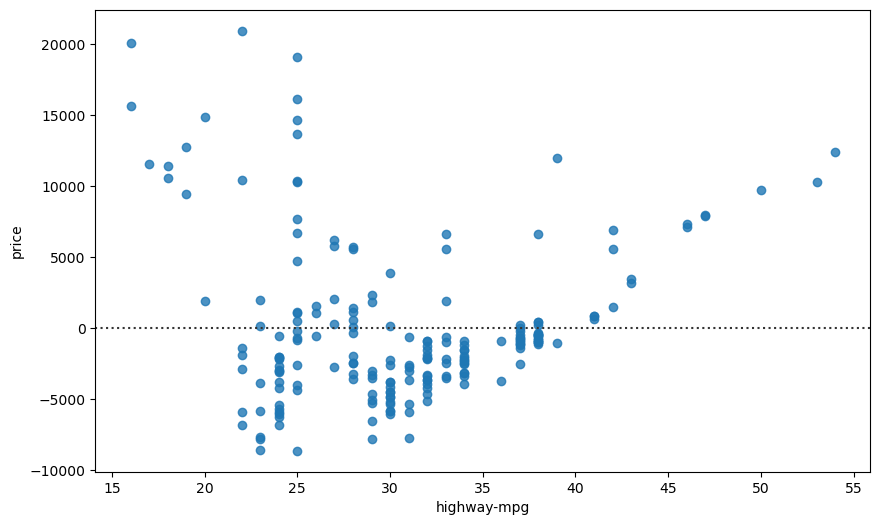

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize = (10,6))
sns.residplot(x='highway-mpg', y = 'price', data = df)
plt.show()
plt.savefig('Images/Residualplot-highway-price.jpg')

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

# Multiple Linear Regression

One way to look at the fit of the model is by looking at the <b>distribution plot.</b> We look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [22]:
# Let's make the prediction

Y_hat = lm.predict(A)
Y_hat[0:5]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344])

C:\Users\Aayush\AppData\Local\Temp\ipykernel_7660\1965603449.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Aayush\AppData\Local\Temp\ipykernel_7660\1965603449.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

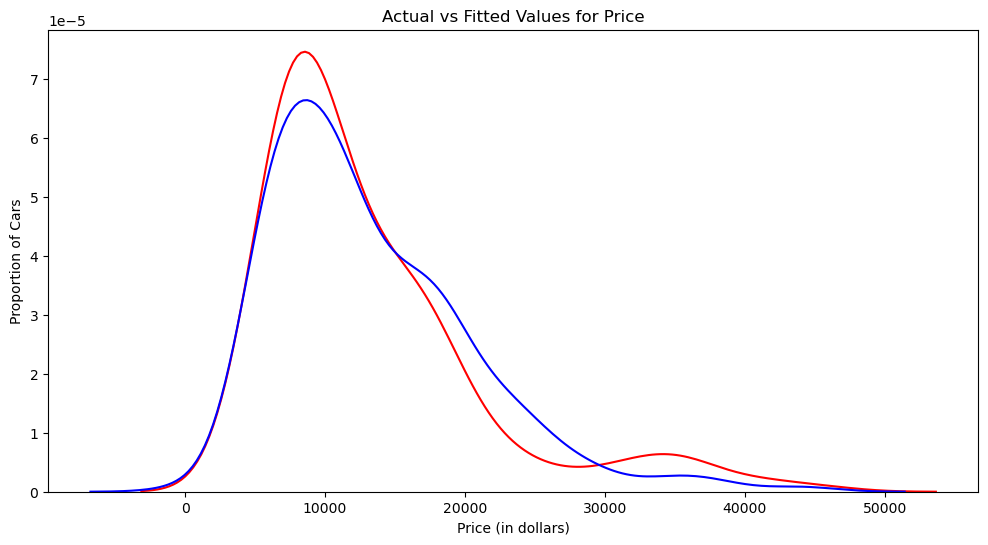

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(12, 6))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()
plt.savefig('Images/ActualVsFittedValue.jpg')

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

# Polynomial Regression and Pipelines

In [9]:
def Polyplot(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new,'-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Lenght')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()

In [10]:
x = df['highway-mpg']
y = df['price']

In [11]:
# lets fit the polynomical using function polyfit, then use the funtion poly1d to display the polynomial function

f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


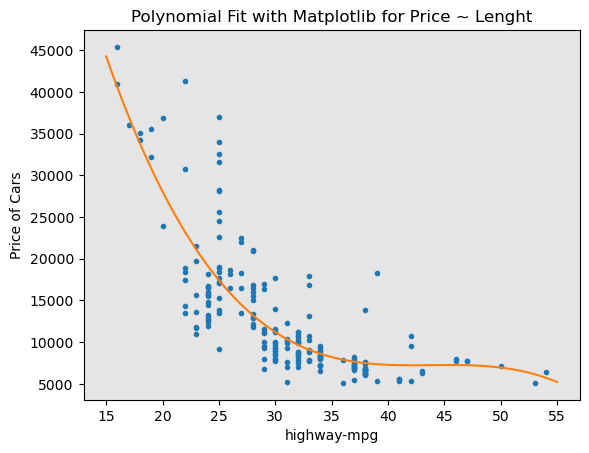

In [12]:
Polyplot(p,x,y,'highway-mpg')

In [13]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<b>Create 11 order polynomial model with variable x and y from above</b>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


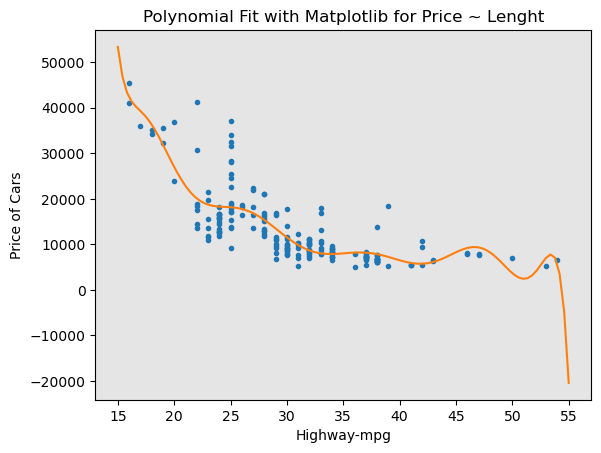

In [14]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

Polyplot(p1,x,y,'Highway-mpg')


In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [20]:
A_pr = pr.fit_transform(A)

In [21]:
A.shape

(201, 4)

In [22]:
A_pr.shape

(201, 15)

In original data, there are 201 samples and 4 features.
After transformation, there are 201 samples and 15 features.

# Pipeline

We use the module <b>Pipeline</b> to create the pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias  = False)),('model',LinearRegression())]

In [25]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [26]:
A = A.astype(float)
pipe.fit(A,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [28]:
ypipe =pipe.predict(A)
ypipe[0:5]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955,
       16135.53737535])

<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using features A nad target y.</b>

In [29]:
Input =[('scale',StandardScaler()),('model',LinearRegression())]

pipe1 = Pipeline(Input)

pipe1.fit(A,y)

ypipe1 = pipe1.predict(A)
ypipe1[0:5]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344])

# Measure for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

   - R^2 / R-squared
   - Mean Square Error (MSE)
   
##### R-squared

R-squared, also known as the coefficient of determination, is a measure to indicate how close the data is to fitted regression line.

The value of the R-squared is the percentage fo variation of the response variable (y) that is explained by a linear model.

##### Mean Squared Error (MSE)

The Mean Square Error measures the average of the squares of errors, i.e. the difference between actual value(y) and the estimated value.

## Model 1: Simple Linear Regression

In [31]:
# Let's calculate the R^2

# highway-mpg

print('The R-square is: ', lm.score(X,Y))

The R-square is:  0.4965911884339175


In [33]:
Yhat  = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [34]:
# Let's import mean_square_error

from sklearn.metrics import mean_squared_error

In [35]:
mse = mean_squared_error(df['price'], Yhat)

print('The mean square error of price and predicted value is :',mse)

The mean square error of price and predicted value is : 31635042.944639895


We can say that ~49.659% of the variation of the price is explained by this simple linear model 'horsepower_fit'.

## Model 2: Multiple Linear Regression

In [36]:
# fit the model
lm.fit(A,df['price'])

# find R^2
print('The R-square is: ', lm.score(A,df['price']))

The R-square is:  0.8093732522175299


In [37]:
# Let's calculate the MSE

y_predict_multifit = lm.predict(A)
y_predict_multifit[0:5]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344])

In [38]:
mse2 = mean_squared_error(df['price'],y_predict_multifit)

print('The mean square error of price and predicted value using multifit is :',mse2)

The mean square error of price and predicted value using multifit is : 11979300.34981888


We can say that ~80.935 % of the variation of price is explained by this multiple linear regression 'multi_fit'

## Model 3: Polynomial Fit

In [39]:
from sklearn.metrics import r2_score

In [40]:
# We apply this function to get the value of R^2

r_squared = r2_score(y, p(x))

print('The R-sqaure value is: ',r_squared)

The R-sqaure value is:  0.6741946663906516


In [42]:
mean_squared_error(df['price'],p(x))

20474146.42636123

We can say that ~67.419% of the variation of price is explained by this polynomial fit

## Prediction and Decision Making

#### Prediction
In the previous section, we trained the model using the method fit, Now we will use the method predict to produce a prediction. Let's import pyplot for ploting. We will also be using some function from numpy

In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
# Create new input
new_input = np.arange(1,100,1).reshape(-1,1)

#fit the model

lm.fit(X,Y)
lm

# produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

C:\Users\Aayush\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

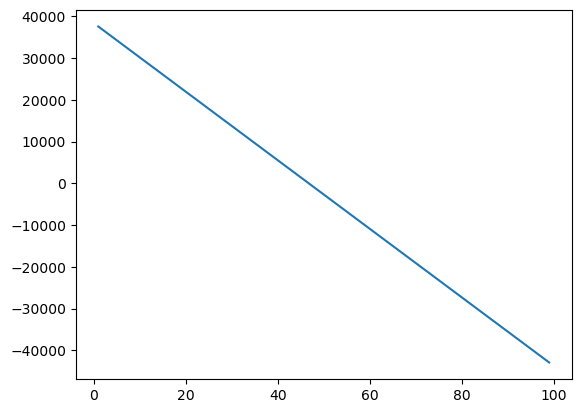

In [46]:
plt.plot(new_input, yhat)
plt.show()

##### Let's take a look at the values for the different models.

<b>Simple Linear Regression</b>: Using Highway-mpg as a Predictor Variable of Price

   - R-squared: 0.4965911884339175
   - MSE : 31635042.944639895 or 3.16 x 10^7
   
<b>Multiple Linear Regression</b>: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variabales of Price

   - R-squared: 0.8093562806577458
   - MSE : 11980366.870726489
   
<b>Polynomial Fit</b>: Using Highway-mpg as a Predictor Variable of price

   - R-sqaured: 0.6741946663906516
   - MSE: 20474146.42636123



### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

In order to compare the result of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.


   - <b>MSE</b>: The MSE of SLR is 3.16 x 10^7 while MLR has an MSE of 1.2 x 10^7. The MSE of MLR is much smaller.
   - <b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and MLR. The R-squared for the SLR (~ 0.497) is very small compared to R-squared for MLR (~0.809).
   
This R-squared in combination with MSE shows that MLR seems like the better model fit in this case compared to SLR.

### Simple Linear Regression Model (SLR) vs Polynomial Fit


   - <b>MSE</b>: We can see that Polynomial Fit brought down MSE, since this MSE is smaller than the one from SLR.
   - <b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
   
Since, the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicing 'price' with 'highway-mpg' as a predictor varaible.

### Multiple Linear Regression Model (MLR) vs Polynomial Fit


   - <b>MSE</b>: The MSE for the MLR is smaller than the MSE for the polynomial Fit.
   - <b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.
   
   
# Conclusion

Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final automobile price.